In [70]:
import numpy as np
import matplotlib.pyplot as plt
import datetime, time
import os, sys
import pandas as pd
from scipy.interpolate import interp1d

sys.path.append('../')
import NEXUSFunctions as nf

import matplotlib.dates as mdates
from   pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [71]:
NR14_t0 = datetime.datetime(2022, 5, 9,18,56,24)
NR15_t0 = datetime.datetime(2022,10,13,10,59,50)
NR16_t0 = datetime.datetime(2023, 1,23,16,50, 0)
NR17_t0 = datetime.datetime(2023, 2, 8,16,15, 0)

days_span = 6

In [72]:
def dt_to_plc_str(dt):
    return dt.strftime("%y%m%d")
                       
def dt_to_mmr_str(dt):
    return dt.strftime("%Y-%m-%d")

print(dt_to_plc_str(NR16_t0))
print(dt_to_mmr_str(NR16_t0))

230123
2023-01-23


In [73]:
series_plc_NR14 = nf.create_date_range(dt_to_plc_str(NR14_t0), days_span+1, fmt="%y%m%d")
offset_plc_NR14 = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc_NR14   = nf.read_plclog_data(series_plc_NR14, offset_plc_NR14)
# data_plc_NR15.keys()

The starting date is: 
2022-05-09 00:00:00


In [74]:
series_plc_NR15 = nf.create_date_range(dt_to_plc_str(NR15_t0), days_span, fmt="%y%m%d")
offset_plc_NR15 = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc_NR15   = nf.read_plclog_data(series_plc_NR15, offset_plc_NR15)
# data_plc_NR15.keys()

The starting date is: 
2022-10-13 00:00:00


In [75]:
series_plc_NR16 = nf.create_date_range(dt_to_plc_str(NR16_t0), days_span, fmt="%y%m%d")
offset_plc_NR16 = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc_NR16   = nf.read_plclog_data(series_plc_NR16, offset_plc_NR16)
# data_plc_NR16.keys()

The starting date is: 
2023-01-23 00:00:00


In [76]:
series_plc_NR17 = nf.create_date_range(dt_to_plc_str(NR17_t0), days_span, fmt="%y%m%d")
offset_plc_NR17 = datetime.timedelta(days=0, hours=0, minutes=0)
data_plc_NR17   = nf.read_plclog_data(series_plc_NR17, offset_plc_NR17)
# data_plc_NR17.keys()

The starting date is: 
2023-02-08 00:00:00


In [77]:
series_mmr_NR14 = nf.create_date_range(dt_to_mmr_str(NR14_t0), days_span+1)
offset_mmr_NR14 = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr_NR14   = nf.read_MACRT_data(series_mmr_NR14, offset_mmr_NR14)
# data_mmr_NR15.keys()

The starting date is: 
2022-05-09 00:00:00


In [78]:
series_mmr_NR15 = nf.create_date_range(dt_to_mmr_str(NR15_t0), days_span)
offset_mmr_NR15 = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr_NR15   = nf.read_MACRT_data(series_mmr_NR15, offset_mmr_NR15)
# data_mmr_NR15.keys()

The starting date is: 
2022-10-13 00:00:00


In [79]:
series_mmr_NR16 = nf.create_date_range(dt_to_mmr_str(NR16_t0), days_span)
offset_mmr_NR16 = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr_NR16   = nf.read_MACRT_data(series_mmr_NR16, offset_mmr_NR16)
# data_mmr_NR16.keys()

The starting date is: 
2023-01-23 00:00:00


In [80]:
series_mmr_NR17 = nf.create_date_range(dt_to_mmr_str(NR17_t0), days_span)
offset_mmr_NR17 = datetime.timedelta(days=0, hours=0, minutes=0)
data_mmr_NR17   = nf.read_MACRT_data(series_mmr_NR17, offset_mmr_NR17)
# data_mmr_NR17.keys()

The starting date is: 
2023-02-08 00:00:00


In [81]:
def pd_td_to_hrs(tdelta):
    return tdelta.total_seconds()/3600.

def pd_td_to_days(tdelta):
    return tdelta.total_seconds()/(24.*3600.)

In [82]:
NR14_time_mmr = (data_mmr_NR14['ctime']-NR14_t0).apply(pd_td_to_days)
NR15_time_mmr = (data_mmr_NR15['ctime']-NR15_t0).apply(pd_td_to_days)
NR16_time_mmr = (data_mmr_NR16['ctime']-NR16_t0).apply(pd_td_to_days)
NR17_time_mmr = (data_mmr_NR17['ctime']-NR17_t0).apply(pd_td_to_days)

NR14_time_plc = (data_plc_NR14['ctime']-NR14_t0).apply(pd_td_to_days)
NR15_time_plc = (data_plc_NR15['ctime']-NR15_t0).apply(pd_td_to_days)
NR16_time_plc = (data_plc_NR16['ctime']-NR16_t0).apply(pd_td_to_days)
NR17_time_plc = (data_plc_NR17['ctime']-NR17_t0).apply(pd_td_to_days)

## Make the temperature plot

<IPython.core.display.Javascript object>


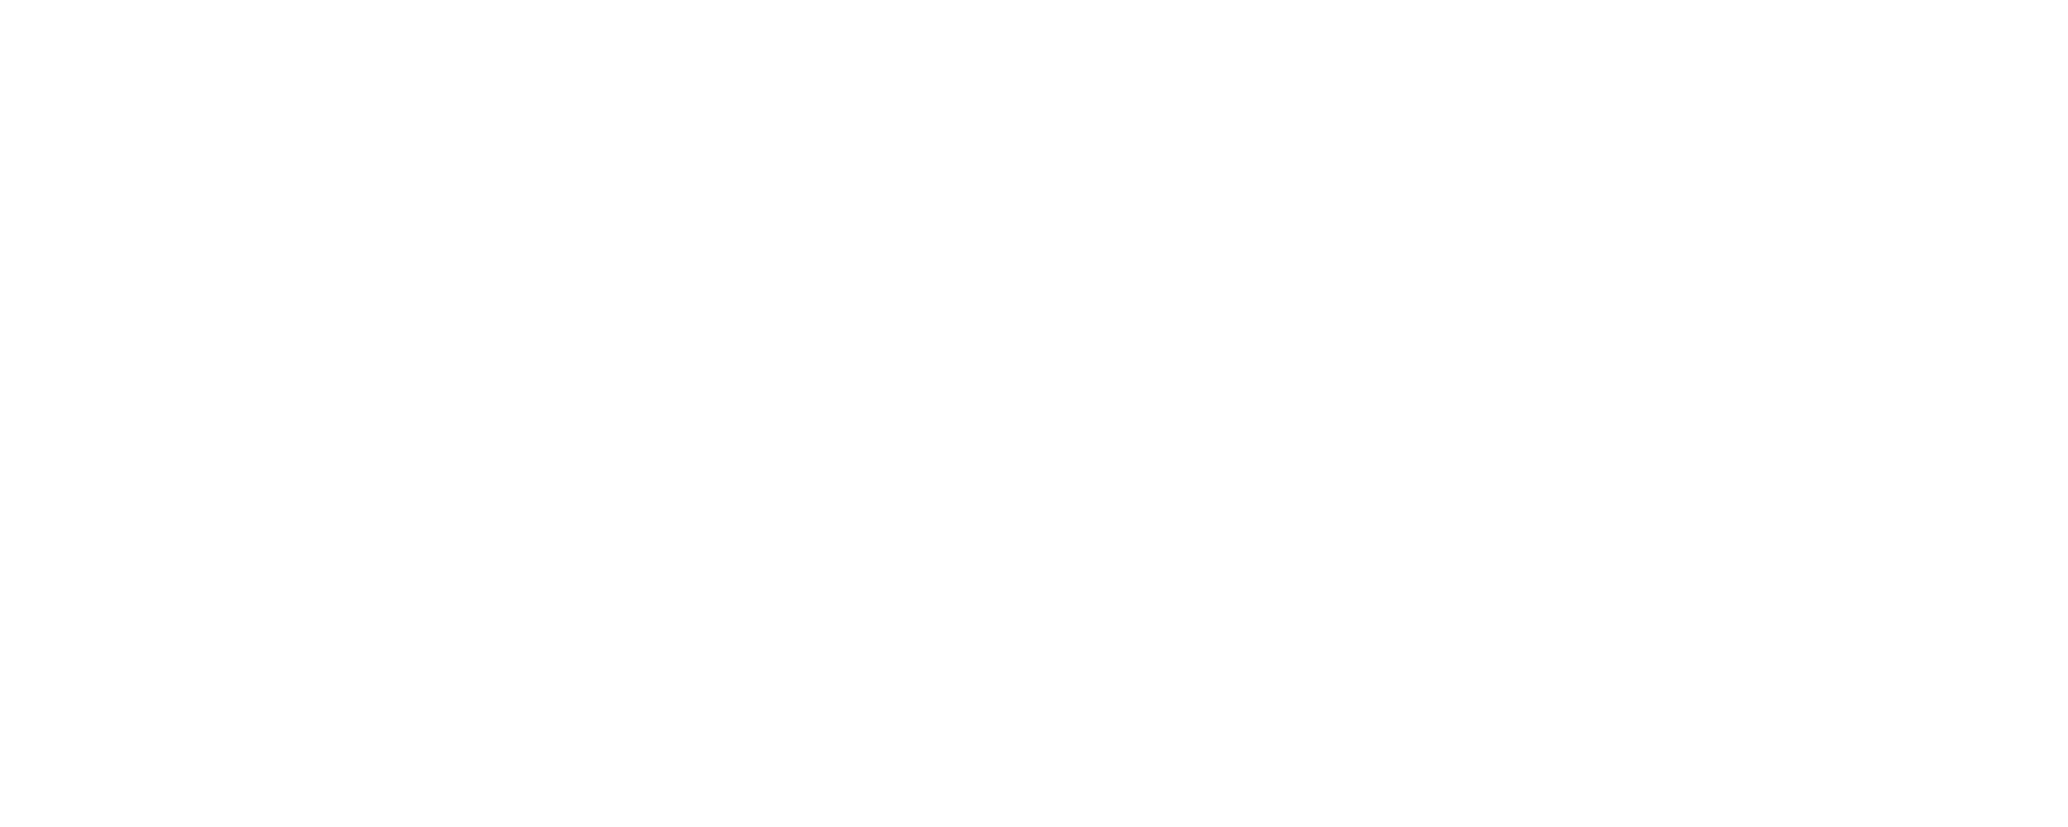

In [83]:
%matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Temp [K]')
a.set_title(r"$t_0^\mathrm{NR17}=$"+str(NR17_t0)+r"$;~t_0^\mathrm{NR16}=$"+str(NR16_t0))

ls_NR14 = "-."
ls_NR15 = ":"
ls_NR16 = "--"
ls_NR17 = "-"

c_CP = 'dodgerblue'
c_St = 'firebrick'
c_MC = 'darkmagenta'
c_1S = 'seagreen'
c_2S = 'goldenrod'

## Plot the MACRT data for Run 14
a.plot(NR14_time_mmr, data_mmr_NR14['COLD PLATE_Conv']  , label='NR14 - CP'   , color=c_CP, ls=ls_NR14)
a.plot(NR14_time_mmr, data_mmr_NR14['STILL_Conv']       , label='NR14 - Still', color=c_St, ls=ls_NR14)
a.plot(NR14_time_mmr, data_mmr_NR14['MIXING CHAMB_Conv'], label='NR14 - MC'   , color=c_MC, ls=ls_NR14)
a.plot(NR14_time_mmr, data_mmr_NR14['1ST STAGE_Conv']   , label='NR14 - 60K'  , color=c_1S, ls=ls_NR14)
a.plot(NR14_time_mmr, data_mmr_NR14['2ND STAGE_Conv']   , label='NR14 - 4K'  , color=c_2S, ls=ls_NR14)

## Plot the MACRT data for Run 15
a.plot(NR15_time_mmr, data_mmr_NR15['COLD PLATE_Conv']  , label='NR15 - CP'   , color=c_CP, ls=ls_NR15)
a.plot(NR15_time_mmr, data_mmr_NR15['STILL_Conv']       , label='NR15 - Still', color=c_St, ls=ls_NR15)
a.plot(NR15_time_mmr, data_mmr_NR15['MIXING CHAMB_Conv'], label='NR15 - MC'   , color=c_MC, ls=ls_NR15)
a.plot(NR15_time_mmr, data_mmr_NR15['1ST STAGE_Conv']   , label='NR15 - 60K'  , color=c_1S, ls=ls_NR15)
a.plot(NR15_time_mmr, data_mmr_NR15['2ND STAGE_Conv']   , label='NR15 - 4K'  , color=c_2S, ls=ls_NR15)

## Plot the PLC temperature data for Run 16
a.plot(NR16_time_plc, data_plc_NR16['RuO2 CP']    , label='NR16 - CP'   , color=c_CP, ls=ls_NR16)
a.plot(NR16_time_plc, data_plc_NR16['Still Stage'], label='NR16 - Still', color=c_St, ls=ls_NR16)
a.plot(NR16_time_plc, data_plc_NR16['FR MC']      , label='NR16 - MC'   , color=c_MC, ls=ls_NR16)
a.plot(NR16_time_plc, data_plc_NR16['1srt Stage'] , label='NR16 - 60K'  , color=c_1S, ls=ls_NR16)
a.plot(NR16_time_plc, data_plc_NR16['2nd Stage']  , label='NR16 - 4K'   , color=c_2S, ls=ls_NR16)

## Plot the PLC temperature data for Run 17
a.plot(NR17_time_plc, data_plc_NR17['RuO2 CP']    , label='NR17 - CP'   , color=c_CP, ls=ls_NR17)
a.plot(NR17_time_plc, data_plc_NR17['Still Stage'], label='NR17 - Still', color=c_St, ls=ls_NR17)
a.plot(NR17_time_plc, data_plc_NR17['FR MC']      , label='NR17 - MC'   , color=c_MC, ls=ls_NR17)
a.plot(NR17_time_plc, data_plc_NR17['1srt Stage'] , label='NR17 - 60K'  , color=c_1S, ls=ls_NR17)
a.plot(NR17_time_plc, data_plc_NR17['2nd Stage']  , label='NR17 - 4K'   , color=c_2S, ls=ls_NR17)

plt.grid()
# plt.legend(loc="best")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)

<IPython.core.display.Javascript object>


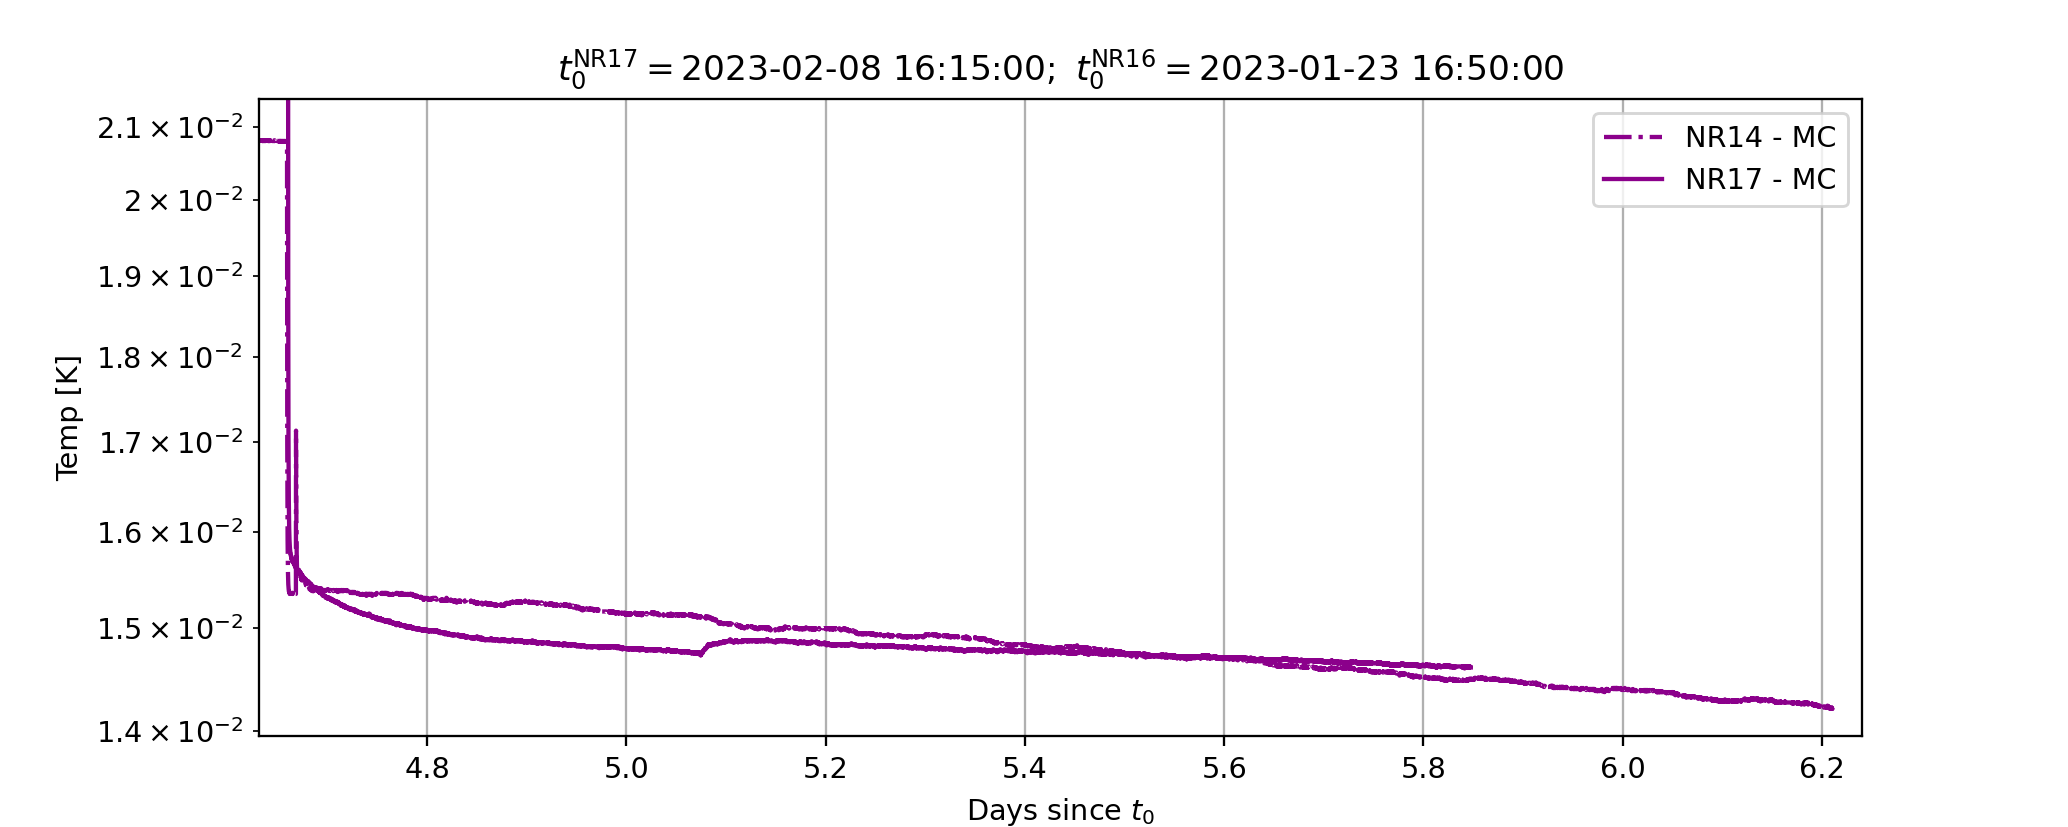

In [85]:
%matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Temp [K]')

ls_NR14 = "-."
ls_NR15 = ":"
ls_NR16 = "--"
ls_NR17 = "-"

c_CP = 'dodgerblue'
c_St = 'firebrick'
c_MC = 'darkmagenta'
c_1S = 'seagreen'
c_2S = 'goldenrod'

## Plot the PLC temperature data for Run 14
# a.plot(NR14_time_plc, data_plc_NR14['RuO2 CP']    , label='NR14 - CP'   , color=c_CP, ls=ls_NR14)
# a.plot(NR14_time_plc, data_plc_NR14['Still Stage'], label='NR14 - Still', color=c_St, ls=ls_NR14)
a.plot(NR14_time_plc, data_plc_NR14['FR MC']      , label='NR14 - MC'   , color=c_MC, ls=ls_NR14)
# a.plot(NR14_time_plc, data_plc_NR14['1srt Stage'] , label='NR14 - 60K'  , color=c_1S, ls=ls_NR14)
# a.plot(NR14_time_plc, data_plc_NR14['2nd Stage']  , label='NR14 - 4K'   , color=c_2S, ls=ls_NR14)

## Plot the PLC temperature data for Run 15
# a.plot(NR15_time_plc, data_plc_NR15['RuO2 CP']    , label='NR15 - CP'   , color=c_CP, ls=ls_NR15)
# a.plot(NR15_time_plc, data_plc_NR15['Still Stage'], label='NR15 - Still', color=c_St, ls=ls_NR15)
# a.plot(NR15_time_plc, data_plc_NR15['FR MC']      , label='NR15 - MC'   , color=c_MC, ls=ls_NR15)
# a.plot(NR15_time_plc, data_plc_NR15['1srt Stage'] , label='NR15 - 60K'  , color=c_1S, ls=ls_NR15)
# a.plot(NR15_time_plc, data_plc_NR15['2nd Stage']  , label='NR15 - 4K'   , color=c_2S, ls=ls_NR15)

## Plot the PLC temperature data for Run 16
# a.plot(NR16_time_plc, data_plc_NR16['RuO2 CP']    , label='NR16 - CP'   , color=c_CP, ls=ls_NR16)
# a.plot(NR16_time_plc, data_plc_NR16['Still Stage'], label='NR16 - Still', color=c_St, ls=ls_NR16)
# a.plot(NR16_time_plc, data_plc_NR16['FR MC']      , label='NR16 - MC'   , color=c_MC, ls=ls_NR16)
# a.plot(NR16_time_plc, data_plc_NR16['1srt Stage'] , label='NR16 - 60K'  , color=c_1S, ls=ls_NR16)
# a.plot(NR16_time_plc, data_plc_NR16['2nd Stage']  , label='NR16 - 4K'   , color=c_2S, ls=ls_NR16)

## Plot the PLC temperature data for Run 17
# a.plot(NR17_time_plc, data_plc_NR17['RuO2 CP']    , label='NR17 - CP'   , color=c_CP, ls=ls_NR17)
# a.plot(NR17_time_plc, data_plc_NR17['Still Stage'], label='NR17 - Still', color=c_St, ls=ls_NR17)
a.plot(NR17_time_plc, data_plc_NR17['FR MC']      , label='NR17 - MC'   , color=c_MC, ls=ls_NR17)
# a.plot(NR17_time_plc, data_plc_NR17['1srt Stage'] , label='NR17 - 60K'  , color=c_1S, ls=ls_NR17)
# a.plot(NR17_time_plc, data_plc_NR17['2nd Stage']  , label='NR17 - 4K'   , color=c_2S, ls=ls_NR17)

plt.title(r"$t_0^\mathrm{NR17}=$"+str(NR17_t0)+r"$;~t_0^\mathrm{NR16}=$"+str(NR16_t0))

plt.grid()
plt.legend(loc="best")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)

# a.set_xlim([1.5,3.5])
# a.set_ylim([1e-1,1.5e2])
a.set_yscale('log')

# a.axhline(y=350e-3, color='k', ls='--')
# a.axhline(y=300e-3, color='k', ls='--')
# a.axhline(y=200e-3, color='k', ls='--')

In [ ]:
Ts = np.array([400, 350, 300, 250, 200])
ts = np.array([3.658337, 3.659017, 3.659820, 3.660514, 3.661455])

dts = (ts[1:]-ts[:-1])*24.*60.*60.
print(dts)

In [ ]:
# %matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Pressure [mbar]')

ls_NR14 = "-."
ls_NR15 = ":"
ls_NR16 = "--"
ls_NR17 = "-"

c_P1 = 'dodgerblue'
c_K3 = 'firebrick'
c_K4 = 'darkmagenta'
c_K5 = 'seagreen'
c_K6 = 'goldenrod'
c_P2 = 'darkgrey'
c_P3 = 'olivedrab'

# ## Plot the PLC data for Run 14
# a.plot(NR14_time_plc, data_plc_NR14['P1 mbar'], label='NR14 - P1', color=c_P1, ls=ls_NR14)
a.plot(NR14_time_plc, data_plc_NR14['K3 mbar'], label='NR14 - K3', color=c_K3, ls=ls_NR14)
a.plot(NR14_time_plc, data_plc_NR14['K4 mbar'], label='NR14 - K4', color=c_K4, ls=ls_NR14)
a.plot(NR14_time_plc, data_plc_NR14['K5 mbar'], label='NR14 - K5', color=c_K5, ls=ls_NR14)
# a.plot(NR14_time_plc, data_plc_NR14['K6 mbar'], label='NR14 - K6', color=c_K6, ls=ls_NR14)
# a.plot(NR14_time_plc, data_plc_NR14['P2 mbar'], label='NR14 - P2', color=c_P2, ls=ls_NR14)
# a.plot(NR14_time_plc, data_plc_NR14['P3 mbar'], label='NR14 - P3', color=c_P3, ls=ls_NR14)

# ## Plot the PLC data for Run 15
# a.plot(NR15_time_plc, data_plc_NR15['P1 mbar'], label='NR15 - P1', color=c_P1, ls=ls_NR15)
a.plot(NR15_time_plc, data_plc_NR15['K3 mbar'], label='NR15 - K3', color=c_K3, ls=ls_NR15)
a.plot(NR15_time_plc, data_plc_NR15['K4 mbar'], label='NR15 - K4', color=c_K4, ls=ls_NR15)
a.plot(NR15_time_plc, data_plc_NR15['K5 mbar'], label='NR15 - K5', color=c_K5, ls=ls_NR15)
# a.plot(NR15_time_plc, data_plc_NR15['K6 mbar'], label='NR15 - K6', color=c_K6, ls=ls_NR15)
# a.plot(NR15_time_plc, data_plc_NR15['P2 mbar'], label='NR15 - P2', color=c_P2, ls=ls_NR15)
# a.plot(NR15_time_plc, data_plc_NR15['P3 mbar'], label='NR15 - P3', color=c_P3, ls=ls_NR15)

# # ## Plot the PLC data for Run 16
# # a.plot(NR16_time_plc, data_plc_NR16['P1 mbar'], label='NR16 - P1', color=c_P1, ls=ls_NR16)
# a.plot(NR16_time_plc, data_plc_NR16['K3 mbar'], label='NR16 - K3', color=c_K3, ls=ls_NR16)
# a.plot(NR16_time_plc, data_plc_NR16['K4 mbar'], label='NR16 - K4', color=c_K4, ls=ls_NR16)
# a.plot(NR16_time_plc, data_plc_NR16['K5 mbar'], label='NR16 - K5', color=c_K5, ls=ls_NR16)
# # a.plot(NR16_time_plc, data_plc_NR16['K6 mbar'], label='NR16 - K6', color=c_K6, ls=ls_NR16)
# # a.plot(NR16_time_plc, data_plc_NR16['P2 mbar'], label='NR16 - P2', color=c_P2, ls=ls_NR16)
# # a.plot(NR16_time_plc, data_plc_NR16['P3 mbar'], label='NR16 - P3', color=c_P3, ls=ls_NR16)

# ## Plot the PLC data for Run 15
# a.plot(NR17_time_plc+0.445, data_plc_NR17['P1 mbar'], label='NR17 - P1', color=c_P1, ls=ls_NR17, alpha=0.5)
a.plot(NR17_time_plc+0.445, data_plc_NR17['K3 mbar'], label='NR17 - K3', color=c_K3, ls=ls_NR17, alpha=0.5)
a.plot(NR17_time_plc+0.445, data_plc_NR17['K4 mbar'], label='NR17 - K4', color=c_K4, ls=ls_NR17, alpha=0.5)
a.plot(NR17_time_plc+0.445, data_plc_NR17['K5 mbar'], label='NR17 - K5', color=c_K5, ls=ls_NR17, alpha=0.5)
# a.plot(NR17_time_plc+0.445, data_plc_NR17['K6 mbar'], label='NR17 - K6', color=c_K6, ls=ls_NR17, alpha=0.5)
# a.plot(NR17_time_plc+0.445, data_plc_NR17['P2 mbar'], label='NR17 - P2', color=c_P2, ls=ls_NR17, alpha=0.5)
# a.plot(NR17_time_plc+0.445, data_plc_NR17['P3 mbar'], label='NR17 - P3', color=c_P3, ls=ls_NR17, alpha=0.5)

# a.set_yscale('log')

plt.grid()
plt.legend(loc="lower right")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)

In [ ]:
# %matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel(r'Days since $t_0$')
a.set_ylabel('Flow rate [µm/s]')

ls_NR14 = "-."
ls_NR15 = ":"
ls_NR16 = "--"
ls_NR17 = "-"

c_FR = 'dodgerblue'

# ## Plot the PLC data for Run 14
a.plot(NR14_time_plc, data_plc_NR14[data_plc_NR14.keys()[8]], label='NR14', color=c_FR, ls=ls_NR14)

# ## Plot the PLC data for Run 15
a.plot(NR15_time_plc, data_plc_NR15[data_plc_NR15.keys()[8]], label='NR15', color=c_FR, ls=ls_NR15)

# ## Plot the PLC data for Run 16
a.plot(NR16_time_plc, data_plc_NR16[data_plc_NR16.keys()[8]], label='NR16', color=c_FR, ls=ls_NR16)

# ## Plot the PLC data for Run 17
a.plot(NR17_time_plc, data_plc_NR17[data_plc_NR17.keys()[8]], label='NR17', color=c_FR, ls=ls_NR15)

# a.set_yscale('log')

plt.grid()
plt.legend(loc="lower right")
# f.autofmt_xdate()
# myFmt = mdates.DateFormatter('%H:%M:%S')
# a.xaxis.set_major_formatter(myFmt)